In [1]:
from datetime import datetime

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 

import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers


In [2]:
df = pd.read_csv('datasets/heart.csv')

df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


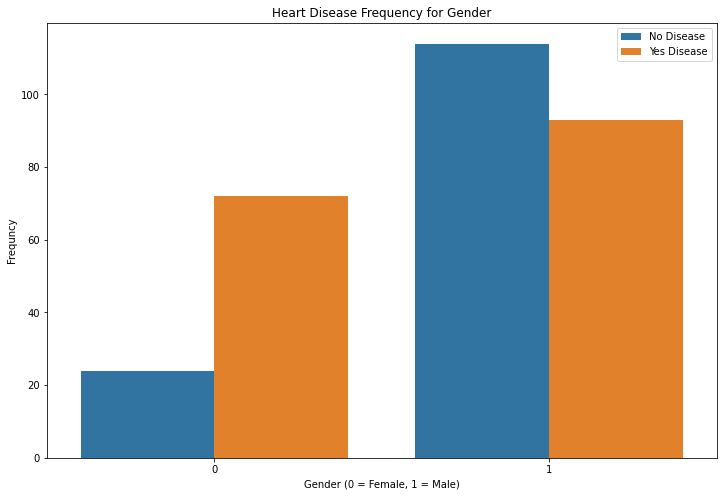

In [7]:
plt.figure(figsize=(12,8))
sns.countplot('sex', hue = 'target', data = df)

plt.title('Heart Disease Frequency for Gender')
plt.legend(['No Disease', 'Yes Disease'])

plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequncy')

plt.show()

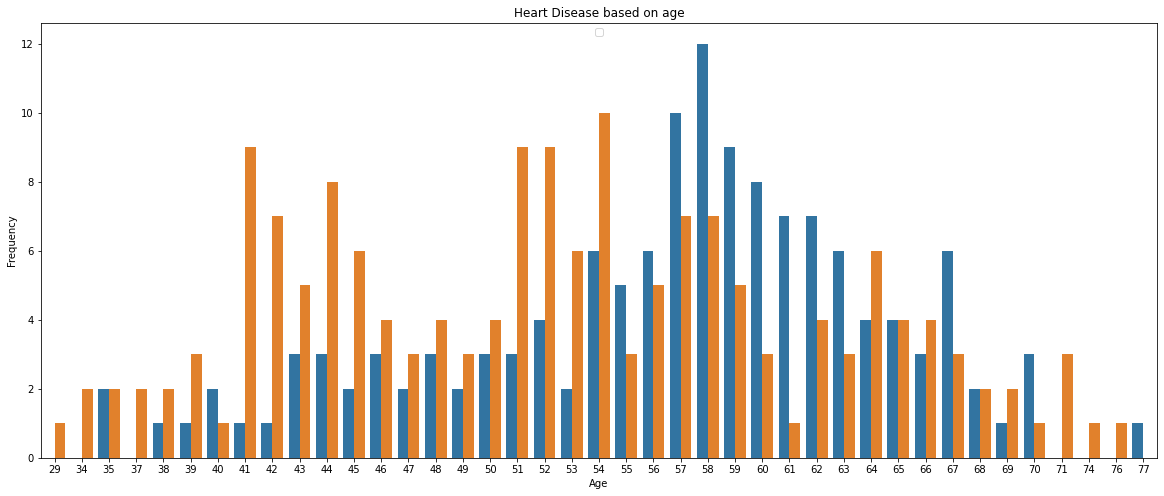

In [8]:
plt.figure(figsize=(20,8))

sns.countplot('age', hue='target', data = df)

plt.title('Heart Disease based on age')

plt.legend('No Disease', 'Yes Disease')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

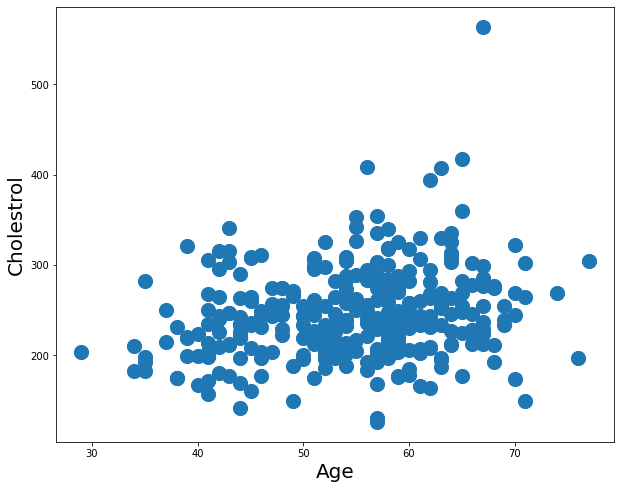

In [9]:
plt.figure(figsize=(10, 8))

plt.scatter(df['age'], df['chol'], s = 200)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholestrol', fontsize = 20)

plt.show()

In [10]:
features = df.drop('target', axis=1)

target = df[['target']]

In [11]:
features.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2


In [12]:
target.sample(2)

,target
110,1
63,1


In [13]:
categorical_features = features[['sex', 'fbs', 'exang', 'cp', 'ca', 'slope', 'thal', 'restecg']].copy()

categorical_features.head()

,sex,fbs,exang,cp,ca,slope,thal,restecg
0,1,1,0,3,0,0,1,0
1,1,0,0,2,0,0,2,1
2,0,0,0,1,0,2,2,0
3,1,0,0,1,0,2,2,1
4,0,0,1,0,0,2,2,1


In [14]:
numeric_features = features[['age', 'trestbps','chol','thalach', 'oldpeak']]

numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [15]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), columns=numeric_features.columns, index=numeric_features.index)

numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [16]:
categorical_features

,sex,fbs,exang,cp,ca,slope,thal,restecg
0,1,1,0,3,0,0,1,0
1,1,0,0,2,0,0,2,1
2,0,0,0,1,0,2,2,0
3,1,0,0,1,0,2,2,1
4,0,0,1,0,0,2,2,1
...,...,...,...,...,...,...,...,...
298,0,0,1,0,0,1,3,1
299,1,0,0,3,0,1,3,1
300,1,1,0,0,2,1,3,1
301,1,0,1,0,1,1,3,1


In [17]:
numeric_features


,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244
...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373
300,1.503641,0.706843,-1.029353,-0.378132,2.036303
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373


In [18]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort= False)

processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,3,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,2,0,0,2,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,1,0,2,2,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,1,0,2,2,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,1,0,0,2,2,1


In [19]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size = 0.2, random_state=1)

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.15, random_state=10)


In [21]:
x_train.shape, x_val.shape, x_test.shape

((205, 13), (37, 13), (61, 13))

In [22]:
y_train.shape, y_val.shape, y_test.shape

((205, 1), (37, 1), (61, 1))

In [23]:
def build_calassification_model():

    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    dense_layer1 = layers.Dense(12, activation='relu')
    x = dense_layer1(inputs)

    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)

    dense_layer2 = layers.Dense(8, activation='relu')
    x = dense_layer2(x)

    prediction_layer = layers.Dense(1, activation='sigmoid')
    predictions = prediction_layer(x)

    model = tf.keras.Model(inputs=inputs, outputs=predictions)

    model.summary()

    optimizer = tf.keras.optimizers.Adam(0.001)
    loss = tf.keras.losses.BinaryCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', tf.keras.metrics.Precision(0.5), tf.keras.metrics.Recall(0.5),])

    return model

In [24]:
model = build_calassification_model()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


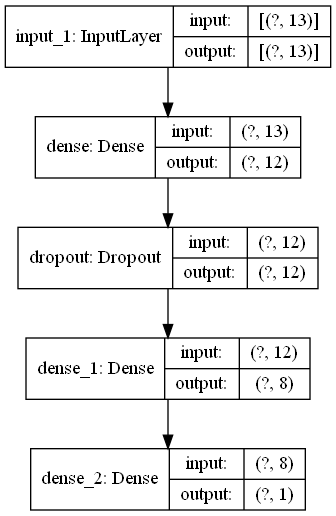

In [25]:
keras.utils.plot_model(model,show_shapes=True, expand_nested=True)

In [26]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values,y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 13), (None, 1)), types: (tf.float64, tf.int64)>

In [27]:
num_epochs = 100


In [28]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [29]:
training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

_accuracy: 0.7027 - val_precision: 0.6667 - val_recall: 0.9000
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5357 - accuracy: 0.7366 - precision: 0.7632 - recall: 0.7632 - val_loss: 0.5655 - val_accuracy: 0.7027 - val_precision: 0.6667 - val_recall: 0.9000
Epoch 13/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7268 - precision: 0.7417 - recall: 0.7807 - val_loss: 0.5555 - val_accuracy: 0.7297 - val_precision: 0.6923 - val_recall: 0.9000
Epoch 14/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.7415 - precision: 0.7328 - recall: 0.8421 - val_loss: 0.5481 - val_accuracy: 0.7297 - val_precision: 0.6923 - val_recall: 0.9000
Epoch 15/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7610 - precision: 0.7731 - recall: 0.8070 - val_loss: 0.5430 - val_accuracy: 0.7568 - val_precision: 0.7037 - val_recall: 0.9500
Epoch 16/100
13/13 [=====================

In [30]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

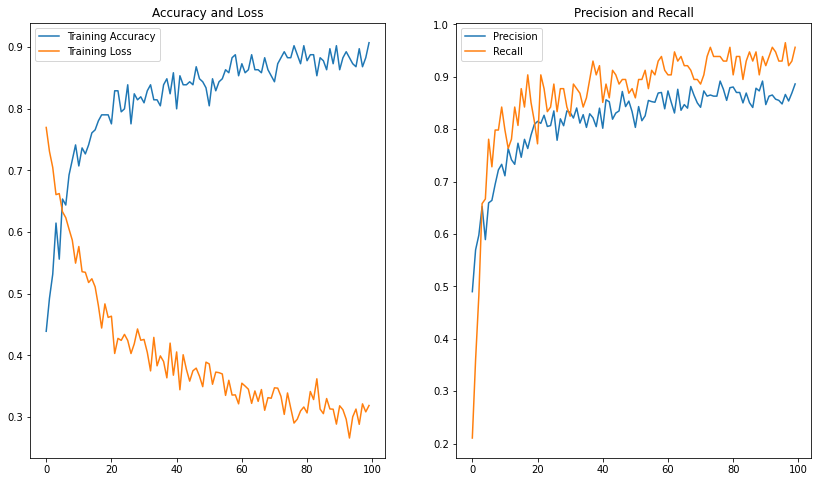

In [31]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision']
recall = training_history.history['recall']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()


In [32]:
score = model.evaluate(x_test,y_test)

score

2/2 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.6885 - precision: 0.6667 - recall: 0.7742


[0.5631909966468811, 0.688524603843689, 0.6666666865348816, 0.774193525314331]

In [33]:
score_df = pd.Series(score, index = model.metrics_names)
score_df    

loss         0.563191
accuracy     0.688525
precision    0.666667
recall       0.774194
dtype: float64

In [34]:
y_predict = model.predict(x_test) 

y_predict

array([[1.3355315e-03],
       [8.8826102e-01],
       [1.8845737e-02],
       [1.6891360e-03],
       [9.0193450e-03],
       [8.2111359e-04],
       [3.8776696e-03],
       [4.8423672e-01],
       [8.0102682e-04],
       [9.5077229e-01],
       [5.6708229e-01],
       [3.6551869e-01],
       [6.1640310e-01],
       [6.8109572e-01],
       [6.2310451e-01],
       [8.6185437e-01],
       [9.8368531e-01],
       [5.5161119e-03],
       [4.8658320e-01],
       [8.0219805e-01],
       [9.2895812e-01],
       [8.3807707e-03],
       [8.5297662e-01],
       [9.2157871e-01],
       [9.6470177e-01],
       [8.9985883e-01],
       [1.1252165e-03],
       [9.7129053e-01],
       [9.2950284e-01],
       [9.5793724e-01],
       [9.6579432e-01],
       [9.1229284e-01],
       [8.2885098e-01],
       [6.5343803e-01],
       [1.3518751e-02],
       [4.6715006e-01],
       [5.6706876e-02],
       [1.4825824e-01],
       [7.5645262e-01],
       [3.8496524e-02],
       [8.6942196e-01],
       [1.894637

In [35]:
y_predict = np.where(y_predict >= 0.5, 1, y_predict)
y_predict = np.where(y_predict < 0.5, 0, y_predict)

y_predict[:20]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [36]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(), 'y_pred': y_predict.flatten().astype('int32') }, index = range(len(y_predict)))

In [37]:
pred_results.sample(4)

,y_test,y_pred
16,1,1
2,0,0
7,1,0
23,1,1


In [38]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,18,7
1,12,24
